<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [33]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


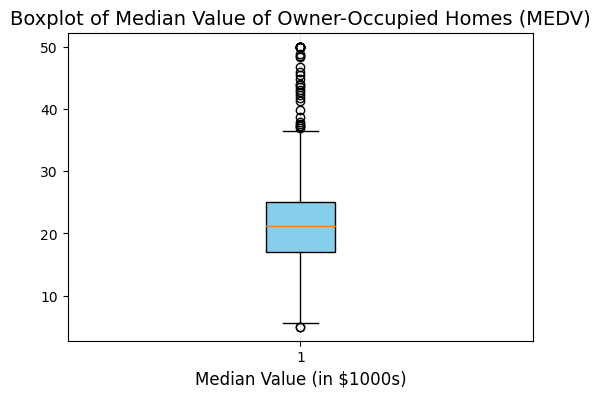

In [28]:
plt.figure(figsize=(6, 4))
plt.boxplot(boston_df['MEDV'],patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)', fontsize=14)
plt.xlabel('Median Value (in $1000s)', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.show()

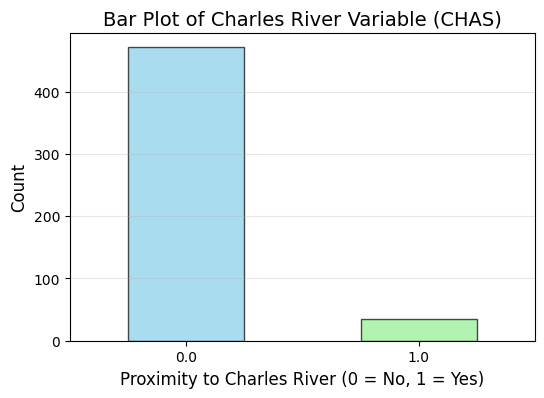

In [25]:
plt.figure(figsize=(6, 4))
boston_df["CHAS"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black', alpha=0.7)
plt.title('Bar Plot of Charles River Variable (CHAS)', fontsize=14)
plt.xlabel('Proximity to Charles River (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

<Figure size 800x600 with 0 Axes>

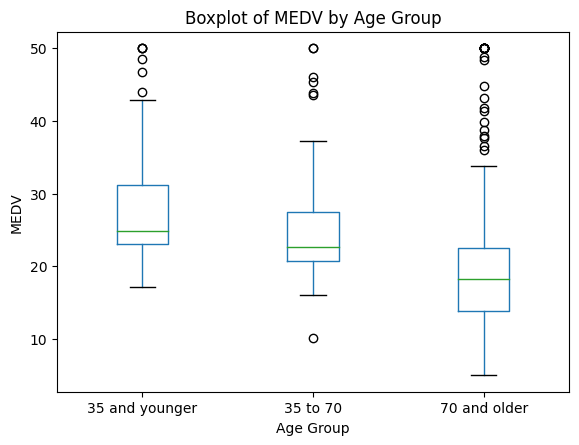

In [19]:
bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', '35 to 70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)


plt.figure(figsize=(8,6))
boston_df.boxplot(column='MEDV', by='AGE_group', grid=False)
plt.title('Boxplot of MEDV by Age Group')
plt.suptitle('')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.show()

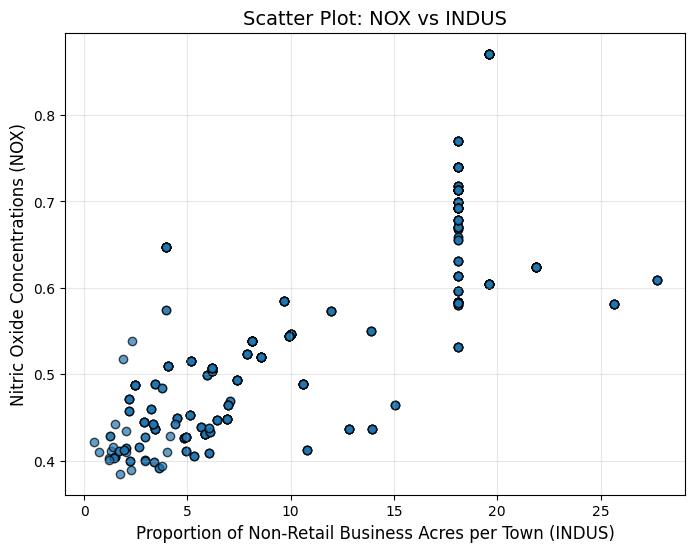

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.7, edgecolor='k')
plt.title('Scatter Plot: NOX vs INDUS', fontsize=14)
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)', fontsize=12)
plt.ylabel('Nitric Oxide Concentrations (NOX)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

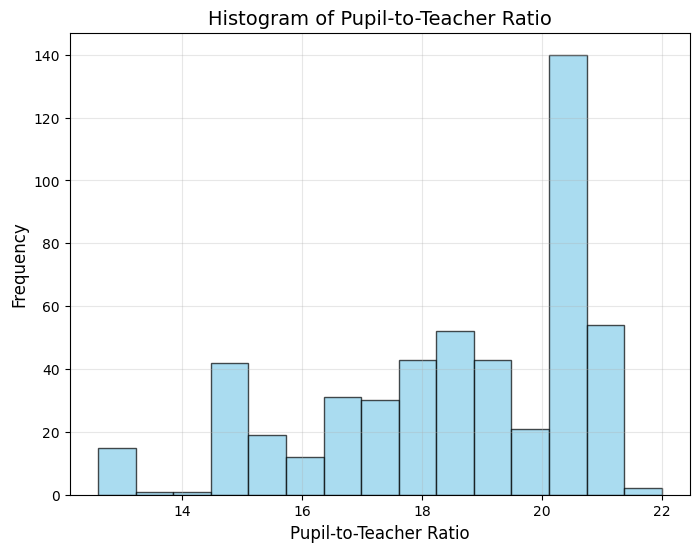

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Pupil-to-Teacher Ratio', fontsize=14)
plt.xlabel('Pupil-to-Teacher Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [31]:
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']  


t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")


if p_value < 0.05:
    print("There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles River.")


T-statistic: 3.113
P-value: 0.004
There is a significant difference in the median value of houses bounded by the Charles River.


In [34]:
bins = [0, 50, 80, 100]
labels = ['Low (<=50%)', 'Medium (>50% and <=80%)', 'High (>80%)']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)


low_group = boston_df[boston_df['AGE_group'] == 'Low (<=50%)']['MEDV']
medium_group = boston_df[boston_df['AGE_group'] == 'Medium (>50% and <=80%)']['MEDV']
high_group = boston_df[boston_df['AGE_group'] == 'High (>80%)']['MEDV']


f_stat, p_value = f_oneway(low_group, medium_group, high_group)


print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("There is a significant difference in the median value of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).")
else:
    print("There is no significant difference in the median value of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).")

F-statistic: 38.251
P-value: 0.000
There is a significant difference in the median value of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).


In [36]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])


print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


if p_value < 0.05:
    print("There is a statistically significant relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).")
else:
    print("There is no statistically significant relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).")


Pearson Correlation Coefficient: 0.764
P-value: 0.000
There is a statistically significant relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).


In [37]:
import statsmodels.api as sm

X = boston_df['DIS']  
y = boston_df['MEDV']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        16:25:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0